# House Sales in King County 

Ce jeu de données contient les prix de vente des maisons de le comté de King (état de Washington), qui comprend notamment la ville de Seattle.
Il comprend les maisons vendues entre mai 2014 et mai 2015.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 0. Import des données

In [41]:
house_sales = pd.read_csv('../static/home_data.csv')

- À quoi ressemblent les données ?

In [42]:
house_sales.head()

id             date   price  bedrooms  bathrooms  sqft_living   
0  7129300520  20141013T000000  221900         3       1.00         1180  \
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
0      5650     1.0           0     0  ...      7        1180              0  \
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0      1955             0    98178  47.5112 -122.257           1340  \
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

- Combien d'individus ?

In [43]:
len(house_sales)

21613

- Quels sont les types qui ont été détéctés automatiquement ?

In [44]:
house_sales.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

- On va convertir le champ "date" en un objet "datetime" qui permettra les comparaisons :

In [45]:
house_sales['date'] = pd.to_datetime(house_sales['date'])

- On va convertir les champs en "sq ft" vers le m² et supprimer les anciens champs :

In [46]:
# Quels sont les champs concernés ?
col_sqft = [col_name for col_name in house_sales.columns if 'sqft' in col_name]
col_sqft

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [47]:
# Pour chaque champ, on effectue la conversion
for col_name in col_sqft:
    house_sales[col_name.replace('sqft', 'sqm')] = house_sales[col_name] / 10.764

In [48]:
# On supprime les anciens champs, 'inplace' (sans faire de copie)
house_sales.drop(col_sqft, axis=1, inplace=True)

- On réaffiche la liste des colonnes et de leurs types :

In [49]:
house_sales.dtypes

id                       int64
date            datetime64[ns]
price                    int64
bedrooms                 int64
bathrooms              float64
floors                 float64
waterfront               int64
view                     int64
condition                int64
grade                    int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
lat                    float64
long                   float64
sqm_living             float64
sqm_lot                float64
sqm_above              float64
sqm_basement           float64
sqm_living15           float64
sqm_lot15              float64
dtype: object

- Avons nous des valeurs manquantes dans certaines colonnes ?

In [50]:
house_sales.isnull().sum()

id              0
date            0
price           0
bedrooms        0
bathrooms       0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
sqm_living      0
sqm_lot         0
sqm_above       0
sqm_basement    0
sqm_living15    0
sqm_lot15       0
dtype: int64

## 1. Explorer les données

- Quelle distribution des prix ?

<Axes: title={'center': "Price of Houses in King's County"}, ylabel='Frequency'>

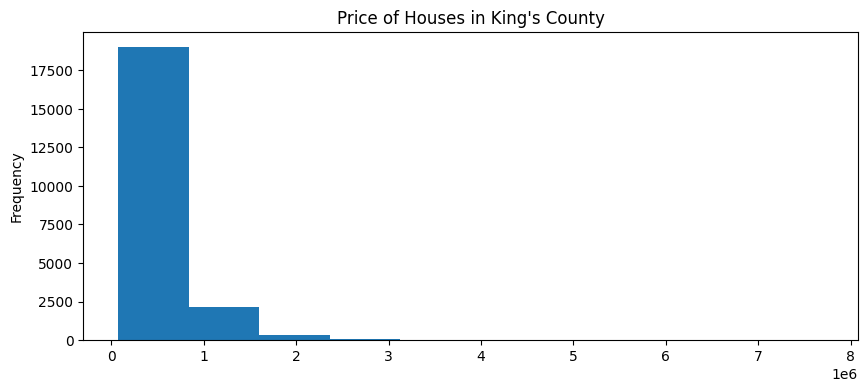

In [51]:
house_sales['price'].plot(kind="hist", figsize=(10,4), title="Price of Houses in King's County")

On peut aussi utiliser la bibliothèque`seaborn` et écrire quelques lignes de code supplémentaires pour améliorer le graphique

<Axes: title={'center': "Price Density of Houses in King's County"}, xlabel='Price in Millions', ylabel='Count'>

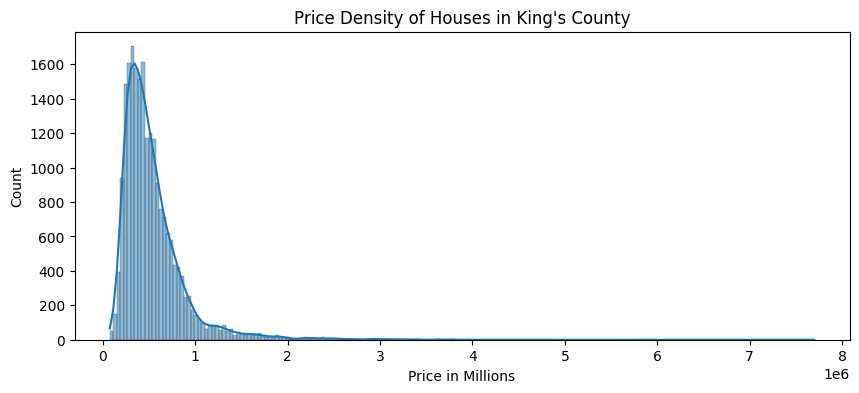

In [92]:
price_dist = sns.histplot(house_sales["price"], kde=True, bins=200)
price_dist.figure.set_size_inches(10, 4)
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
price_dist

<Axes: title={'center': "Log Price Density of Houses in King's County"}, xlabel='Log Price in Millions', ylabel='Count'>

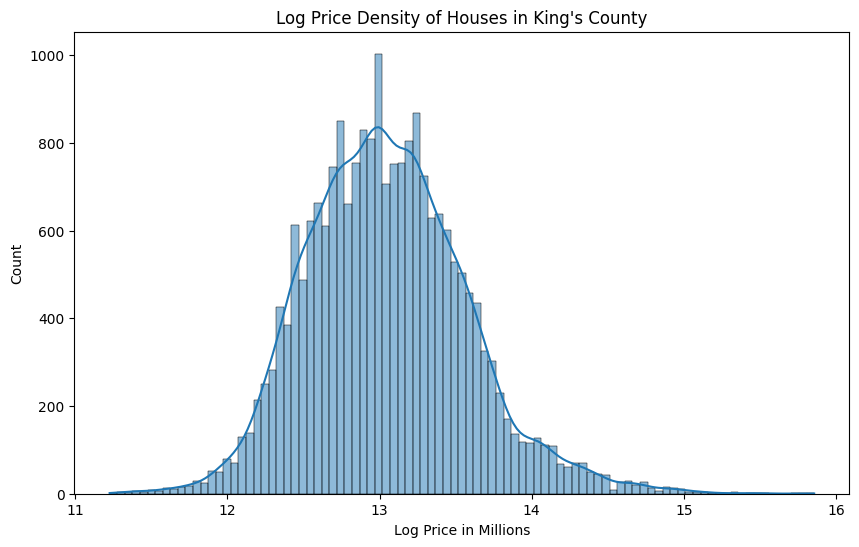

In [53]:
logged_price_dist = sns.histplot(np.log(house_sales["price"]), kde=True)
logged_price_dist.figure.set_size_inches(10,6)
logged_price_dist.set(xlabel="Log Price in Millions", title="Log Price Density of Houses in King's County")
logged_price_dist

- Combien de maisons par nombre d'étages ?

In [109]:
house_sales['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Mais le résultat est trié par le compte par étage au lieu d'être trié par le nombre d'étage.. on va y remédier...

In [111]:
count_by_floor = house_sales['floors'].value_counts()[house_sales['floors'].sort_values().unique()]
count_by_floor

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: count, dtype: int64

<Axes: xlabel='floors'>

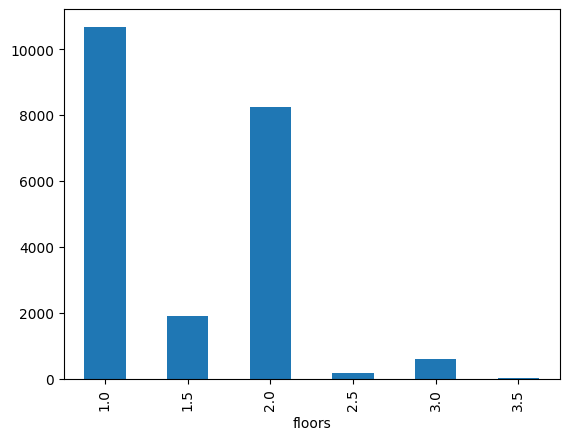

In [112]:
count_by_floor.plot(kind="bar")

- Utiliser la fonction `boxplot` de la bibliothèque `seaborn` pour comparer les prix des maisons avec vue sur le front de mer ou sans vue sur le front de mer :

<Axes: xlabel='waterfront', ylabel='price'>

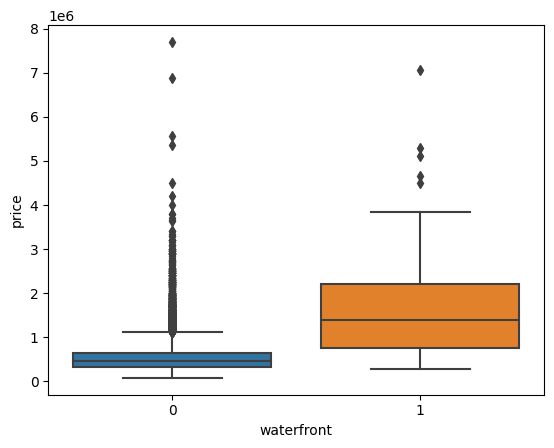

In [56]:
sns.boxplot(x=house_sales.waterfront, y=house_sales.price)

Attention, seulement 163 maisons de notre jeu de données sont face à l'eau /

In [57]:
len(house_sales[house_sales.waterfront == 1])

163

- Quelle distribution des prix au regard des notes données à chaque maisons ?

<Axes: title={'center': 'Price distribution across grade levels'}, xlabel='grade', ylabel='price'>

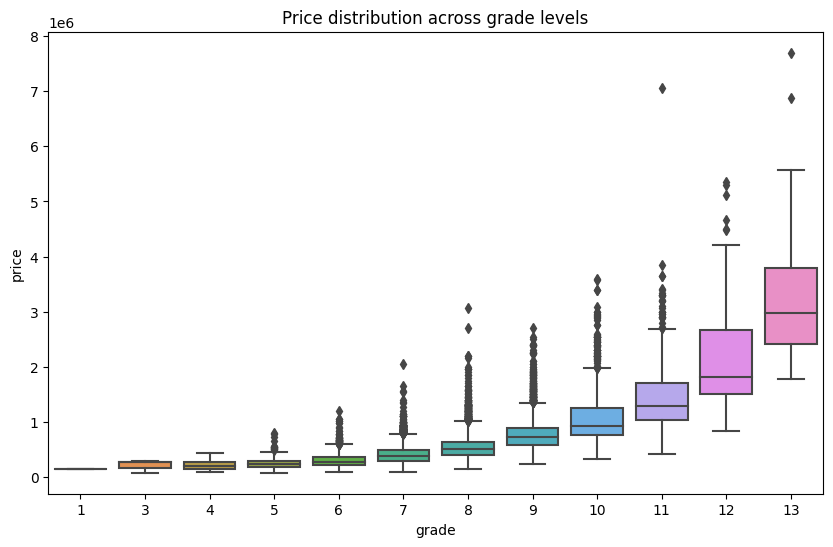

In [58]:
ax = sns.boxplot(x=house_sales['grade'], y=house_sales['price'])
ax.figure.set_size_inches(10,6)
ax.set_title('Price distribution across grade levels')
ax

- Utilisation de la méthode `corr` des `DataFrame` ("Calcul de la corrélation par paire des colonnes, en excluant les valeurs NA/nulles"), en enlevant certaines colonnes :

In [116]:
house_sales.loc[:, ~house_sales.columns.isin(['id', 'date'])].corr()

price  bedrooms  bathrooms    floors  waterfront      view   
price         1.000000  0.308350   0.525138  0.256794    0.266369  0.397293  \
bedrooms      0.308350  1.000000   0.515884  0.175429   -0.006582  0.079532   
bathrooms     0.525138  0.515884   1.000000  0.500653    0.063744  0.187737   
floors        0.256794  0.175429   0.500653  1.000000    0.023698  0.029444   
waterfront    0.266369 -0.006582   0.063744  0.023698    1.000000  0.401857   
view          0.397293  0.079532   0.187737  0.029444    0.401857  1.000000   
condition     0.036362  0.028472  -0.124982 -0.263768    0.016653  0.045990   
grade         0.667434  0.356967   0.664983  0.458183    0.082775  0.251321   
yr_built      0.054012  0.154178   0.506019  0.489319   -0.026161 -0.053440   
yr_renovated  0.126434  0.018841   0.050739  0.006338    0.092885  0.103917   
zipcode      -0.053203 -0.152668  -0.203866 -0.059121    0.030285  0.084827   
lat           0.307003 -0.008931   0.024573  0.049614   -0.014274  0.006157   
long          0.021626  0.129473   0.223042  0.125419   -0.041910 -0.078400   
sqm_living    0.702035  0.576671   0.754665  0.353949    0.103818  0.284611   
sqm_lot       0.089661  0.031703   0.087740 -0.005201    0.021604  0.074710   
sqm_above     0.605567  0.477600   0.685342  0.523885    0.072075  0.167649   
sqm_basement  0.323816  0.303093   0.283770 -0.245705    0.080588  0.276947   
sqm_living15  0.585379  0.391638   0.568634  0.279885    0.086463  0.280439   
sqm_lot15     0.082447  0.029244   0.087175 -0.011269    0.030703  0.072575   

              condition     grade  yr_built  yr_renovated   zipcode       lat   
price          0.036362  0.667434  0.054012      0.126434 -0.053203  0.307003  \
bedrooms       0.028472  0.356967  0.154178      0.018841 -0.152668 -0.008931   
bathrooms     -0.124982  0.664983  0.506019      0.050739 -0.203866  0.024573   
floors        -0.263768  0.458183  0.489319      0.006338 -0.059121  0.049614   
waterfront     0.016653  0.082775 -0.026161      0.092885  0.030285 -0.014274   
view           0.045990  0.251321 -0.053440      0.103917  0.084827  0.006157   
condition      1.000000 -0.144674 -0.361417     -0.060618  0.003026 -0.014941   
grade         -0.144674  1.000000  0.446963      0.014414 -0.184862  0.114084   
yr_built      -0.361417  0.446963  1.000000     -0.224874 -0.346869 -0.148122   
yr_renovated  -0.060618  0.014414 -0.224874      1.000000  0.064357  0.029398   
zipcode        0.003026 -0.184862 -0.346869      0.064357  1.000000  0.267048   
lat           -0.014941  0.114084 -0.148122      0.029398  0.267048  1.000000   
long          -0.106500  0.198372  0.409356     -0.068372 -0.564072 -0.135512   
sqm_living    -0.058753  0.762704  0.318049      0.055363 -0.199430  0.052529   
sqm_lot       -0.008958  0.113621  0.053080      0.007644 -0.129574 -0.085683   
sqm_above     -0.158214  0.755923  0.423898      0.023285 -0.261190 -0.000816   
sqm_basement   0.174105  0.168392 -0.133124      0.071323  0.074845  0.110538   
sqm_living15  -0.092824  0.713202  0.326229     -0.002673 -0.279033  0.048858   
sqm_lot15     -0.003406  0.119248  0.070958      0.007854 -0.147221 -0.086419   

                  long  sqm_living   sqm_lot  sqm_above  sqm_basement   
price         0.021626    0.702035  0.089661   0.605567      0.323816  \
bedrooms      0.129473    0.576671  0.031703   0.477600      0.303093   
bathrooms     0.223042    0.754665  0.087740   0.685342      0.283770   
floors        0.125419    0.353949 -0.005201   0.523885     -0.245705   
waterfront   -0.041910    0.103818  0.021604   0.072075      0.080588   
view         -0.078400    0.284611  0.074710   0.167649      0.276947   
condition    -0.106500   -0.058753 -0.008958  -0.158214      0.174105   
grade         0.198372    0.762704  0.113621   0.755923      0.168392   
yr_built      0.409356    0.318049  0.053080   0.423898     -0.133124   
yr_renovated -0.068372    0.055363  0.007644   0.023285      0.071323   
zipcode     

- Si on veut seulement afficher la colonne "prix", trié par ordre croissant

In [60]:
house_sales.corr()['price'].sort_values()

zipcode        -0.053203
id             -0.016762
date           -0.004357
long            0.021626
condition       0.036362
yr_built        0.054012
sqm_lot15       0.082447
sqm_lot         0.089661
yr_renovated    0.126434
floors          0.256794
waterfront      0.266369
lat             0.307003
bedrooms        0.308350
sqm_basement    0.323816
view            0.397293
bathrooms       0.525138
sqm_living15    0.585379
sqm_above       0.605567
grade           0.667434
sqm_living      0.702035
price           1.000000
Name: price, dtype: float64

- Affichons cette matrice en utilisant `seaborn` mais cette fois en modifiant certain aspects du graphique grâce à l'API de `matplotlib` :

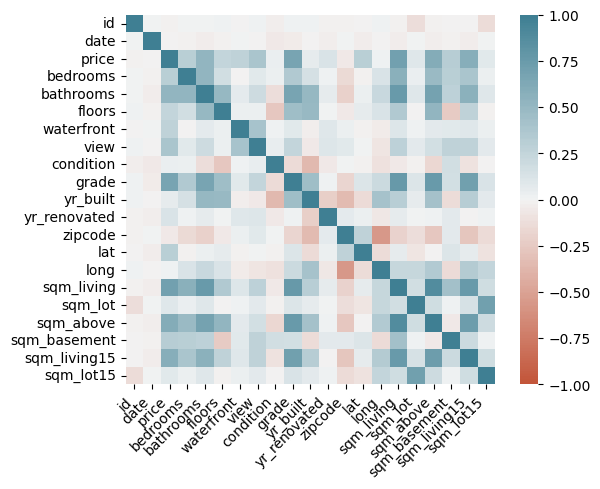

In [61]:
ax = sns.heatmap(
    house_sales.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<Axes: xlabel='sqm_living', ylabel='price'>

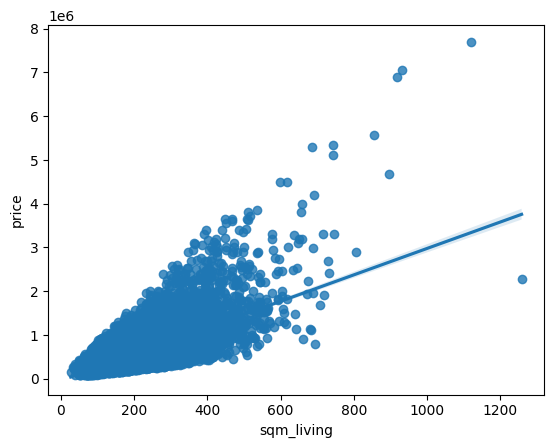

In [62]:
sns.regplot(x=house_sales.sqm_living, y=house_sales.price)

La bibliothèque `seaborn` se base sur matplotlib, on pourra ainsi passer des paramètres supplémentaires, en utilisant les paramètres de `matplotlib` pour personnaliser le graphique produit.
De même, elle se base sur `statsmodels`

In [63]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is

<Axes: xlabel='sqm_living', ylabel='price'>

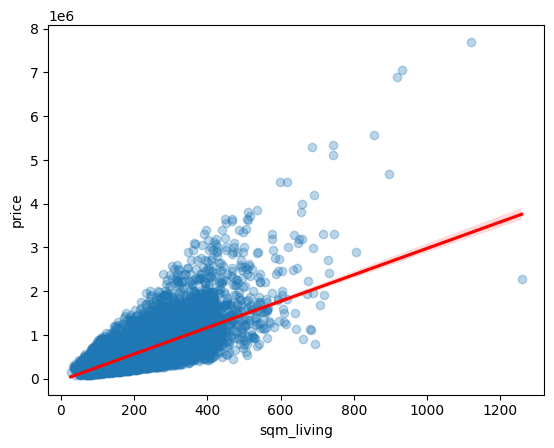

In [64]:
sns.regplot(
    x=house_sales.sqm_living,
    y=house_sales.price,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.3},
)

## 2. Convertir le jeu de données en un jeu de données spatiales

In [65]:
import geopandas as gpd
from shapely import Point

geometry = [Point(xy) for xy in zip(house_sales.long, house_sales.lat)]
gdf = gpd.GeoDataFrame(house_sales, crs="EPSG:4326", geometry=geometry)

<Axes: >

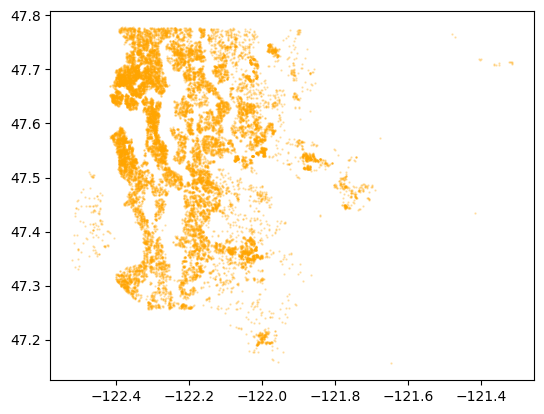

In [66]:
gdf.plot(color="orange", markersize=0.4, alpha=0.3)

- Reprojeter en Web Mercator et ajouter un fond de carte...

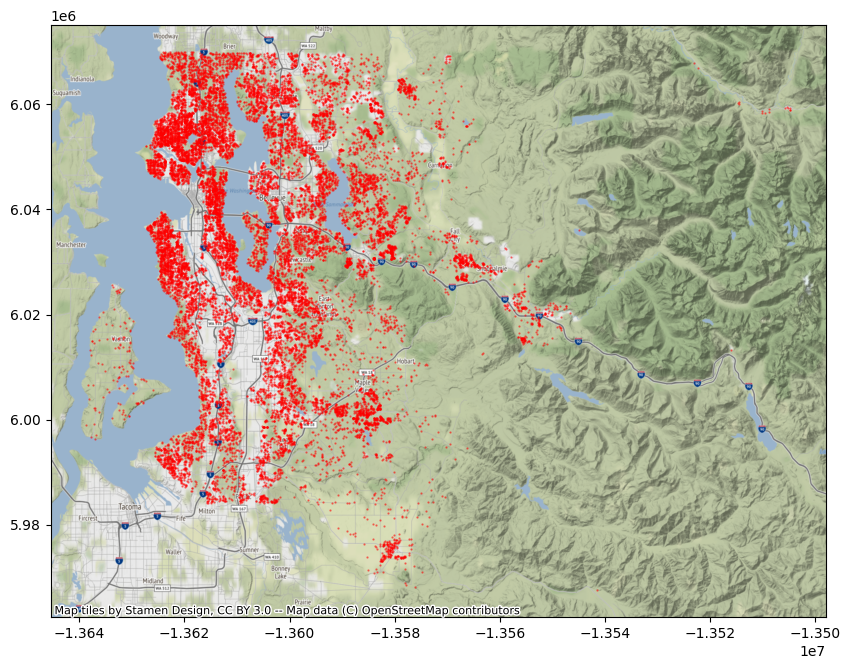

In [67]:
import contextily as cx

gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot(figsize=(10, 10), color="red", markersize=0.4, alpha=0.5)
cx.add_basemap(ax)

- Ou faire un carte interactive à afficher dans le notebook :

In [68]:
import folium

In [69]:
# Cette fois on ne veut visualiser que les maisons au bord de l'eau
gdf_with_view = gdf[gdf.waterfront == 1]

In [70]:
# On récupére l'emprise du jeu de données
bounds = gdf_with_view.total_bounds

In [71]:
# On calcul les coordonées du centre
center = [
    (bounds[2] + bounds[0]) / 2,
    (bounds[3] + bounds[1]) / 2,
]
center # Longitude, Latitude, mais Folium veut Latitude, Longitude

[-122.28649999999999, 47.55025]

In [72]:
map = folium.Map(location=center[::-1], tiles="Stamen Terrain", zoom_start=10)

for index, row in gdf_with_view.iterrows():
    coordinates = [row['lat'], row['long']]
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup=f'''
                Prix: {row['price']}$
                <br>
                Superficie habitable: {round(row['sqm_living'], 1)}m2
            ''',
            icon=folium.Icon(color="blue"),
        )
    )

map

## 3. Aller plus loin dans l'analyse des données

Sur la base des observations menées jusqu'ici on a une meilleure idée des variables qui pourraient impacter le prix d'une maison dans le compté de King.

On va maintenant se concentrer sur l'utilisation d'un modèle de régression linéaire pour prédire le prix d'une maison.

Il y a plusieurs assomptions :
- Les variables d'entrées sont indépendantes
- La relation entre les variables indépendantes et dépendantes est linéaire
- Les résidus 
-
-

In [73]:
from sklearn import decomposition, preprocessing, model_selection 
import statsmodels.api as sm
from statsmodels.tools import eval_measures

On va supprimer différentes variables qui ne permettront pas d'expliquer les prix (ou qui concernent un nombre trop faible d'individus) :

In [74]:
X = house_sales.drop(
    ["id", "date", "yr_renovated",
     "lat", "long", "zipcode", "waterfront"], axis=1)
X

price  bedrooms  bathrooms  floors  view  condition  grade  yr_built   
0      221900         3       1.00     1.0     0          3      7      1955  \
1      538000         3       2.25     2.0     0          3      7      1951   
2      180000         2       1.00     1.0     0          3      6      1933   
3      604000         4       3.00     1.0     0          5      7      1965   
4      510000         3       2.00     1.0     0          3      8      1987   
...       ...       ...        ...     ...   ...        ...    ...       ...   
21608  360000         3       2.50     3.0     0          3      8      2009   
21609  400000         4       2.50     2.0     0          3      8      2014   
21610  402101         2       0.75     2.0     0          3      7      2009   
21611  400000         3       2.50     2.0     0          3      8      2004   
21612  325000         2       0.75     2.0     0          3      7      2008   

       sqm_living     sqm_lot   sqm_above  sqm_basement  sqm_living15   
0      109.624675  524.897808  109.624675      0.000000    124.489038  \
1      238.758826  672.798216  201.597919     37.160907    157.004831   
2       71.534745  929.022668   71.534745      0.000000    252.694166   
3      182.088443  464.511334   97.547380     84.541063    126.347083   
4      156.075808  750.650316  156.075808      0.000000    167.224080   
...           ...         ...         ...           ...           ...   
21608  142.140468  105.072464  142.140468      0.000000    142.140468   
21609  214.604236  540.040877  214.604236      0.000000    170.011148   
21610   94.760312  125.418060   94.760312      0.000000     94.760312   
21611  148.643627  221.850613  148.643627      0.000000    130.992196   
21612   94.760312   99.962839   94.760312      0.000000     94.760312   

        sqm_lot15  
0      524.897808  
1      709.680416  
2      748.978075  
3      464.511334  
4      697.045708  
...           ...  
21608  140.189521  
21609  668.896321  
21610  186.454849  
21611  119.565217  
21612  126.068376  

[21613 rows x 14 columns]

<Axes: >

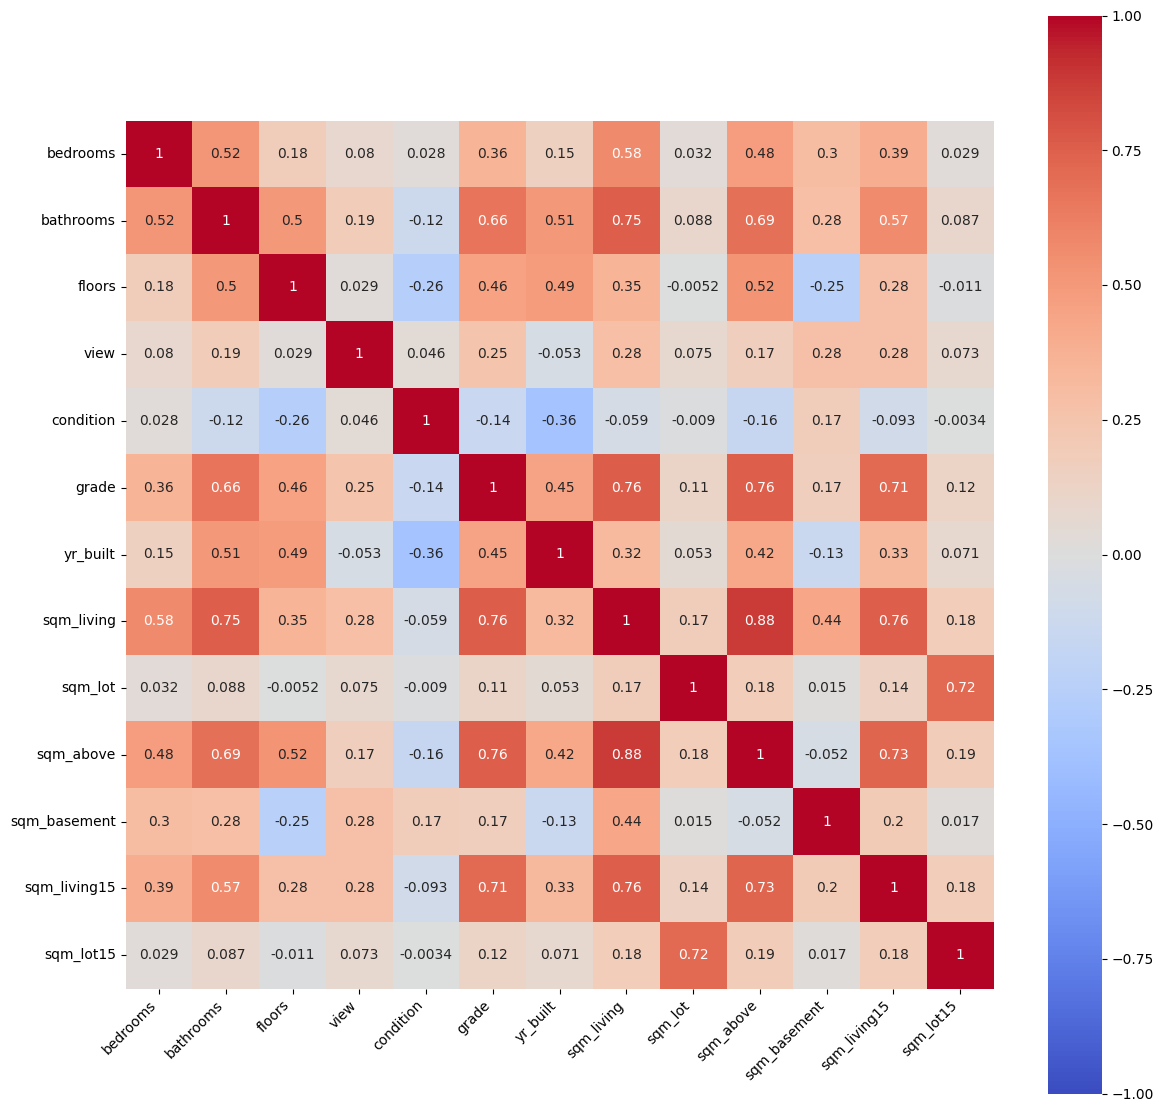

In [75]:
ax = sns.heatmap(
    X.drop(['price'], axis=1).corr(), 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.figure.set_size_inches(14, 14)
ax

In [76]:
X_ = X.drop(['price'], axis=1)
x = preprocessing.StandardScaler().fit_transform(X_.values)

pca = decomposition.PCA(n_components=.85)
components = pca.fit_transform(x)

pca_df = pd.DataFrame(data=components, columns=['PC' + str(i) for i in range(1, components.shape[1] + 1)])
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0     -2.372938 -0.416163  0.203452 -0.224164  0.318938 -0.830395  0.247698
1      0.068620 -0.461831 -0.189075 -0.022361  0.149434 -0.062283  0.496835
2     -2.795539 -0.081609  0.493578 -0.886348 -0.075262 -1.587750 -0.504601
3     -0.785304  1.995368 -1.262263  1.541116 -0.098361  1.816308 -0.420520
4     -0.562137 -0.755056  0.182851 -0.181429  0.420448 -0.512967 -0.526000
...         ...       ...       ...       ...       ...       ...       ...
21608  0.466654 -2.719371 -0.001894 -0.260805 -0.098600  1.737656  0.429534
21609  1.247591 -1.663288 -0.051376  0.404453  0.272692  0.454875  0.395342
21610 -2.209491 -2.177779  0.497195 -0.820069  0.249200  0.902129 -0.356490
21611 -0.031346 -1.897813 -0.032561 -0.160717  0.293658  0.945076 -0.014733
21612 -2.220816 -2.171320  0.474476 -0.821786  0.238844  0.885990 -0.346307

[21613 rows x 7 columns]

<Axes: >

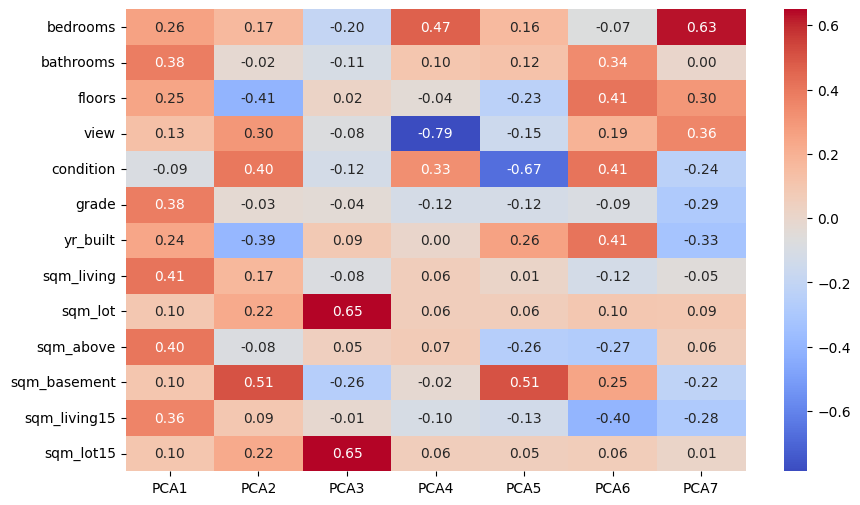

In [77]:
ax = sns.heatmap(
    pca.components_.T, 
    cmap = "coolwarm", 
    yticklabels=X.drop("price", axis=1).columns,
    xticklabels=[ "PCA"+str(x) for x in range(1,components.shape[1]+1)],
    annot = True,
    fmt = ".2f",
)

ax.figure.set_size_inches(10,6)
ax

In [84]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, alpha=0.3)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

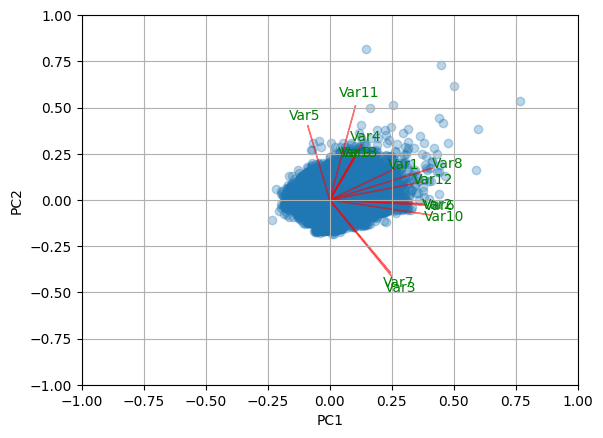

In [85]:
myplot(components[:, 0:2], np.transpose(pca.components_[0:2, :]))

In [86]:
X_pca = pca_df
y = house_sales["price"].rename("Log of Actual Price")

X_pca_train, X_pca_test, y_pca_train, y_pca_test = model_selection.train_test_split(X_pca, y)

y_pca_train = y_pca_train.transform(np.log)
y_pca_test = y_pca_test.transform(np.log)

X_pca_train = sm.add_constant(X_pca_train)
X_pca_test = sm.add_constant(X_pca_test)

# Linear Regression on Principal Components
pca_est = sm.OLS(list(y_pca_train), X_pca_train).fit()
print("Using PCA:")
print(pca_est.summary())
y_pca_pred = pca_est.predict(X_pca_test)
y_pca_pred = y_pca_pred.rename("Log of Predicted Price")

Using PCA:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3248.
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        13:43:15   Log-Likelihood:                -5589.4
No. Observations:               16209   AIC:                         1.119e+04
Df Residuals:                   16201   BIC:                         1.126e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0474      0.003   4861.2

In [87]:
# Print the P-value for each coefficient
print(pca_est.summary2().tables[1]['P>|t|'])

const     0.000000e+00
PC1       0.000000e+00
PC2       0.000000e+00
PC3      3.738637e-150
PC4      2.554339e-108
PC5      2.155881e-239
PC6       1.208544e-52
PC7       1.191206e-23
Name: P>|t|, dtype: float64


In [88]:
# Print the root mean square error
print("Root Mean Square Error: ", eval_measures.rmse(y_pca_test, y_pca_pred))

Root Mean Square Error:  0.3371006497107024


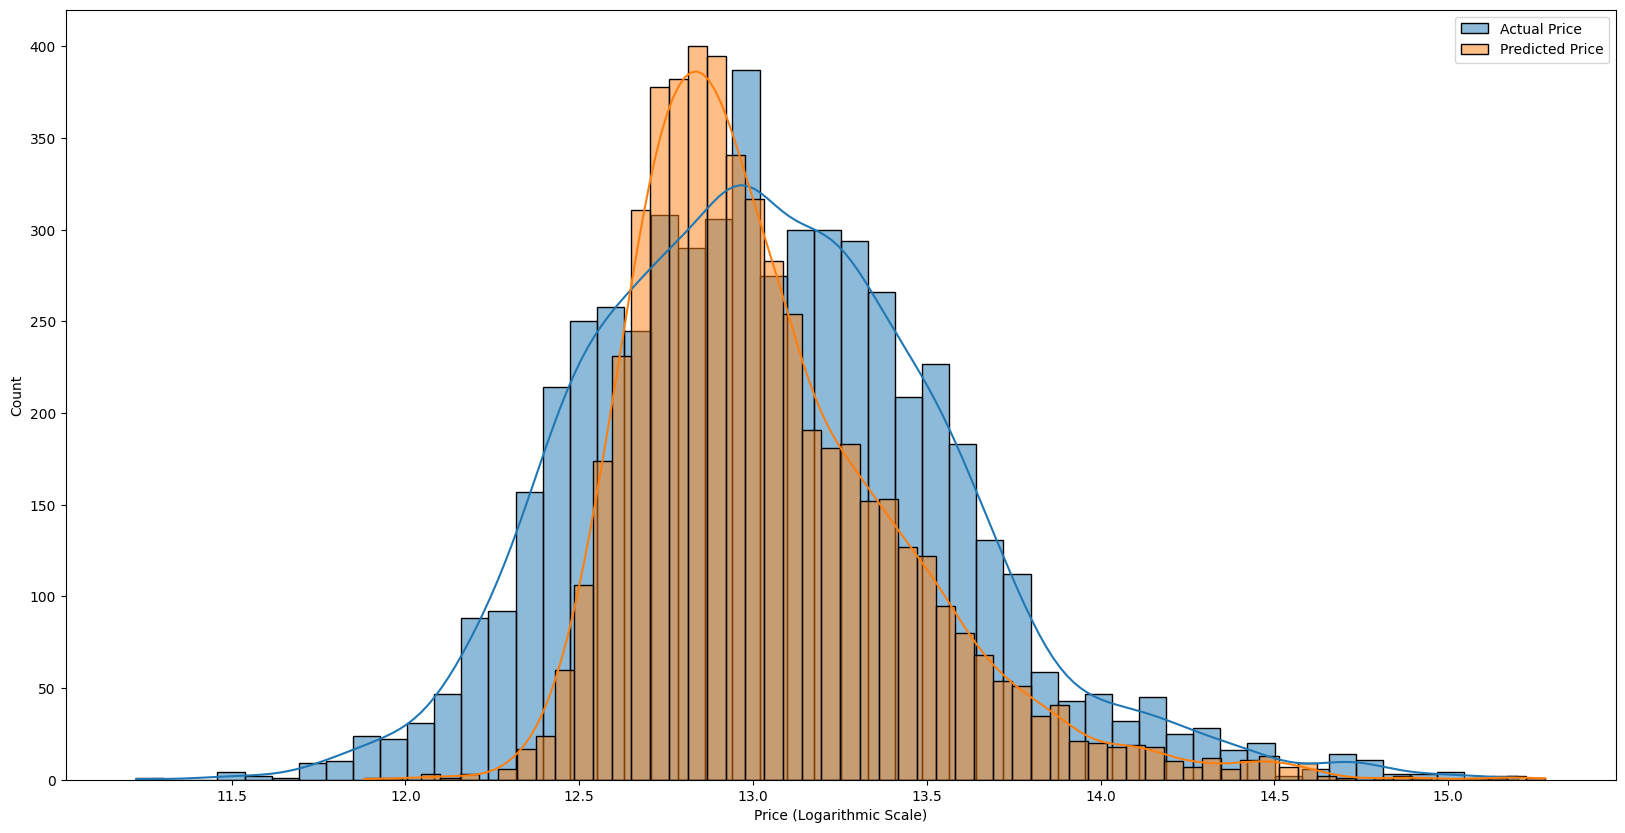

In [89]:
# Plot distribution of predictions
f, ax = plt.subplots(figsize=(20, 10)) 
sns.histplot(y_pca_test, kde=True, label="Actual Price")
sns.histplot(y_pca_pred, kde=True, label="Predicted Price")
plt.xlabel("Price (Logarithmic Scale)")
plt.legend()
plt.show()

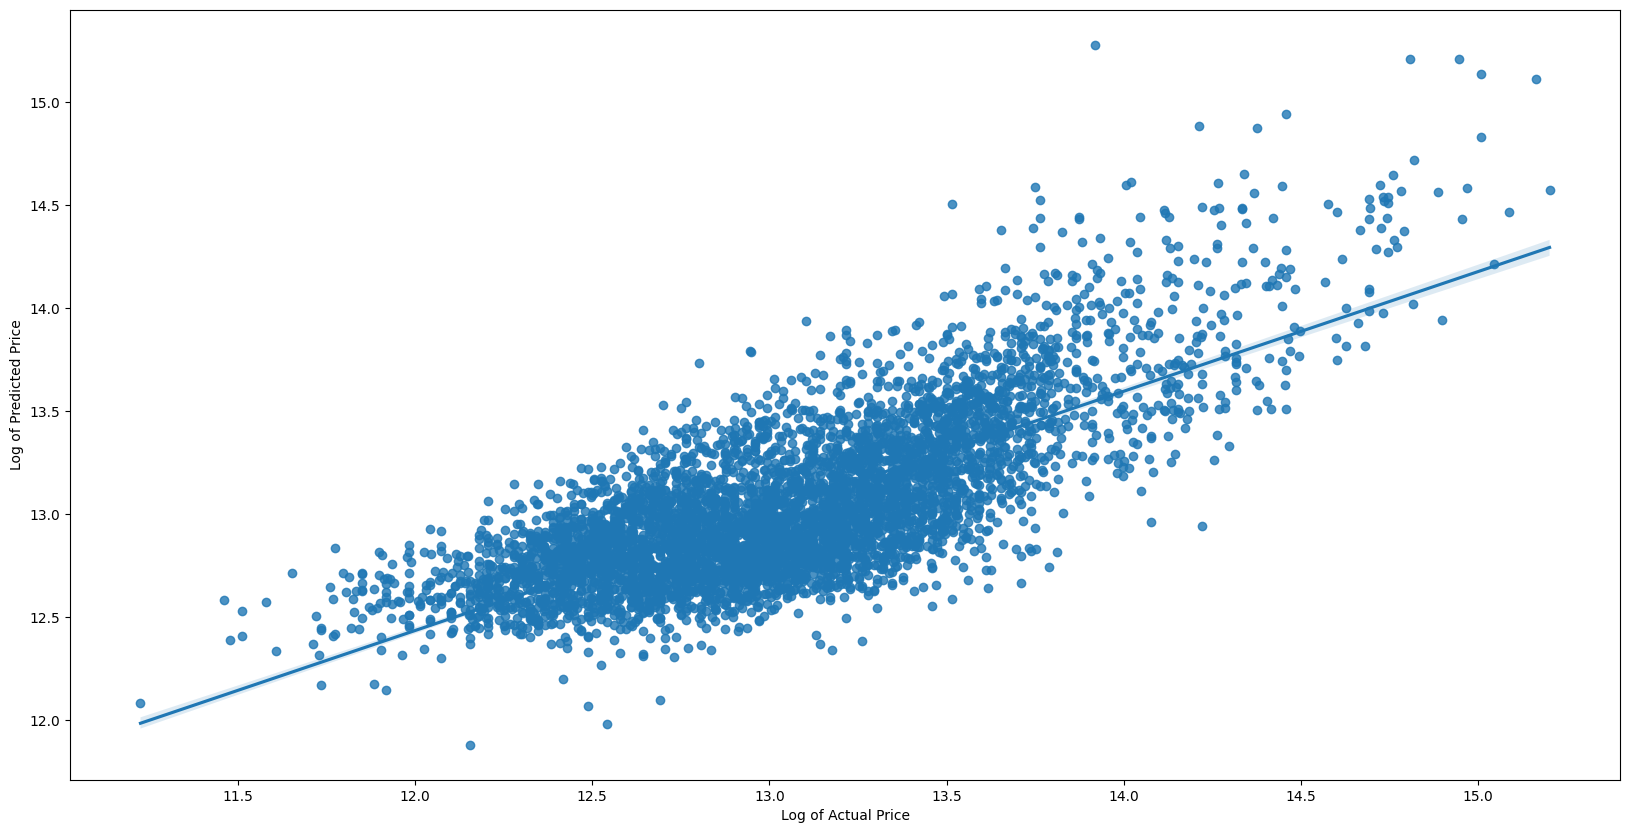

In [90]:
# Plot prediction versus real value scatterplot
f, ax = plt.subplots(figsize=(20, 10)) 
sns.regplot(x=y_pca_test, y =y_pca_pred)
plt.show()

Nous avons donc créé un modèle de régression linéaire qui prédit le prix d'une maison dans le comté de King, WA, entre 2014 et 2015, compte tenu des paramètres souhaités pour les chambres à coucher, les salles de bain, la superficie du logement, la superficie du terrain, les étages, la vue, l'état, le niveau, la superficie de l'étage, la superficie du sous-sol, l'année de construction, la superficie du logement15 et la superficie du terrain15.

Nous sommes en mesure de rejeter l'hypothèse nulle selon laquelle il n'y a pas de relation entre les prix des maisons et nos composantes principales. Chaque composante principale a un coefficient dont la P-Value est significativement inférieure à a = 0.01. Cela signifie que nos prédicteurs ont un effet sur la variable dépendante. Par exemple, le PC3 était principalement pondéré par `sqm_lot` et `sqm_lot15` et avait une forte relation négative avec le prix des maisons. Plus la superficie du terrain d'une propriété augmentait, plus le prix diminuait. Cela peut s'expliquer par le fait que les maisons avec des terrains plus grands sont situées dans des zones rurales et que leur prix sera beaucoup plus bas que celui des maisons situées dans des zones urbaines.

Cependant, notre modèle n'est pas parfait. Son coefficient de détermination R2 est légèrement inférieur à 0,60. Étant donné que nous travaillons avec des données réelles qui contiennent intrinsèquement du bruit, ce n'est pas une si mauvaise valeur. Cependant, cela signifie toujours que plus de 40 % de la variance des prix du logement ne peut être expliquée par les composantes principales sélectionnées ou, à leur tour, par les caractéristiques d'entrée originales. En outre, l'erreur quadratique moyenne du modèle est de 0,3, ce qui signifie que les prix prédits se situent dans un facteur de XXXX des prix observés. Cela nuit à l'utilisation du modèle, car le doublement du prix d'une maison modifie considérablement son accessibilité. Étant donné que nos caractéristiques prennent déjà en compte plusieurs caractéristiques de base des maisons, il est peu probable que nous puissions créer des prédictions de prix plus précises sans informations supplémentaires.